<a href="https://colab.research.google.com/github/Almamun809/Daily-NLP/blob/main/Fake_News_Detection_Bangla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Fake-1K.csv"
!ls "/content/drive/My Drive/Authentic-48K.csv"

Mounted at /content/drive
'/content/drive/My Drive/JU_IT_FND/Fake_news_dataset/Fake-1K.csv'
'/content/drive/My Drive/JU_IT_FND/Fake_news_dataset/Authentic-48K.csv'


In [ ]:
import pandas as pd

fake = pd.read_csv('/content/drive/My Drive/Fake-1K.csv', engine='python', encoding='utf-8')
auth = pd.read_csv('/content/drive/My Drive/Authentic-48K.csv', engine='python', encoding='utf-8')

In [ ]:
auth.head(4)

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1


In [ ]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

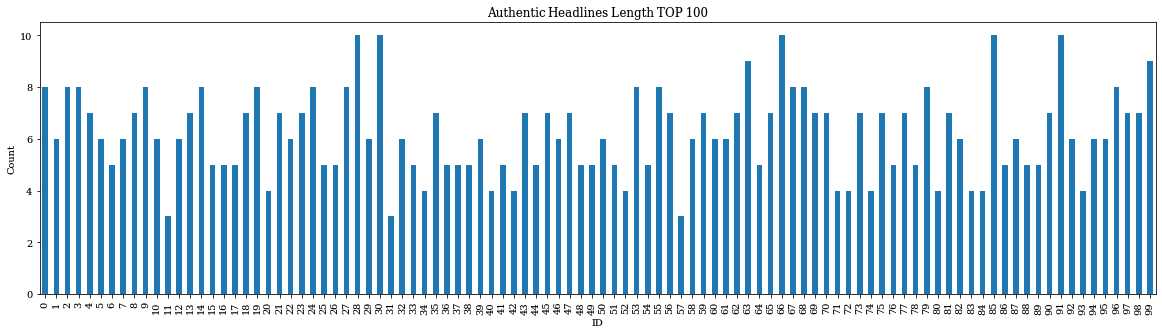

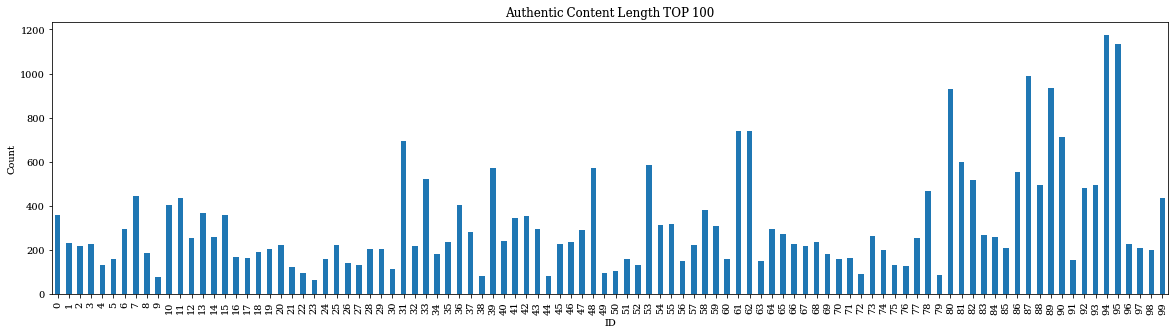

In [ ]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

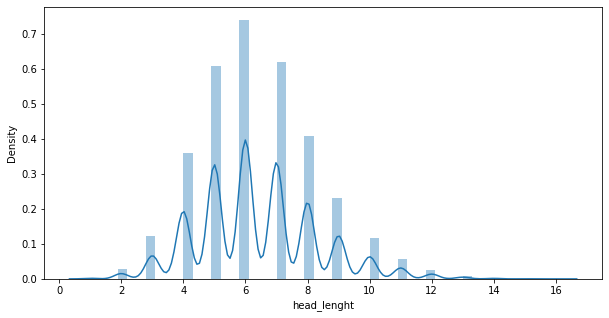

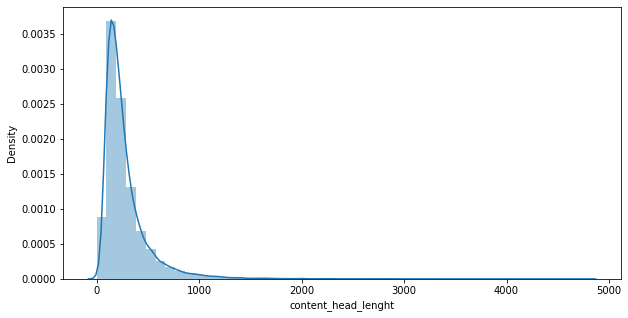

In [ ]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

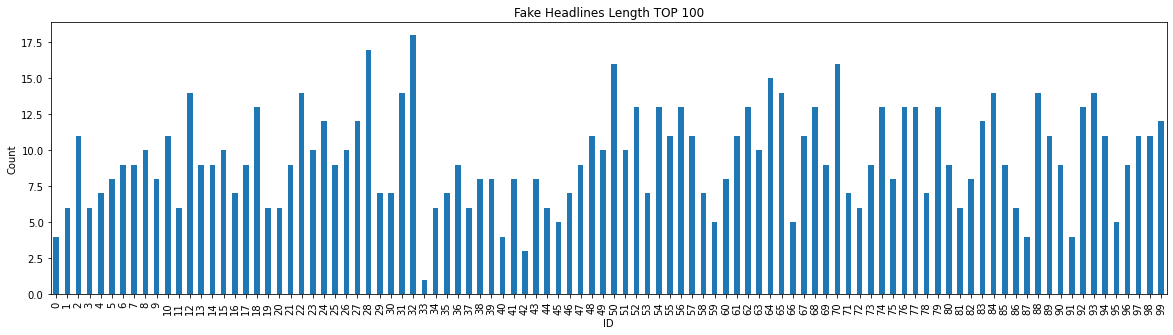

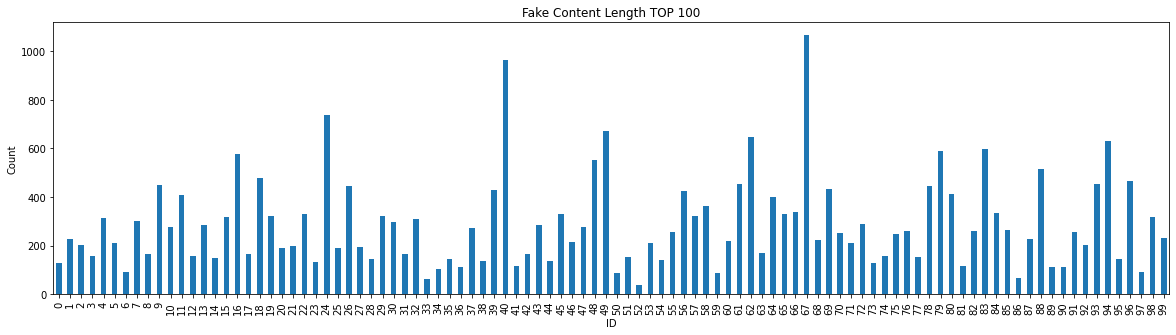

In [ ]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

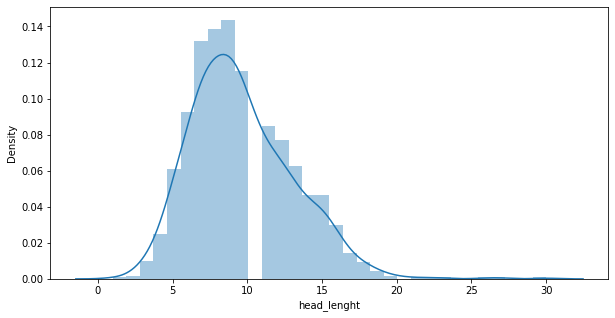

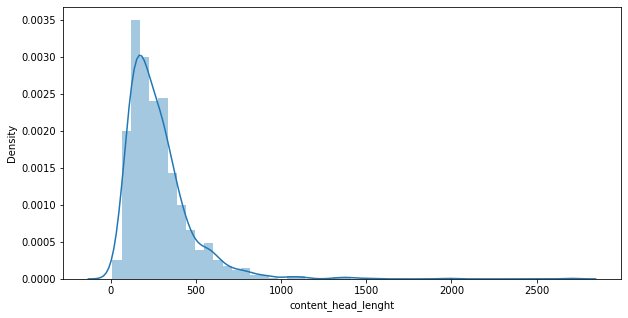

In [ ]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-02-16 15:51:37--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83, 2606:4700:3037::6815:b42, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.005s  

2023-02-16 15:51:38 (64.4 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

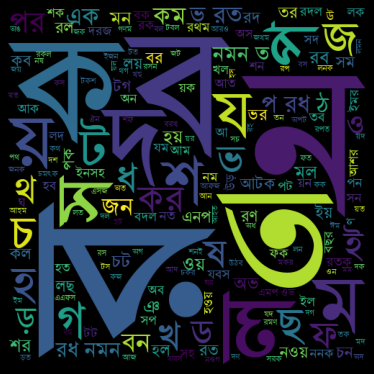

In [ ]:
s= " ".join(auth.headline[:100])
plot_world(s)

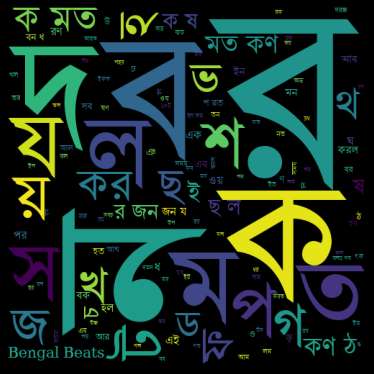

In [ ]:
s= " ".join(fake.headline[:100])
plot_world(s)

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [ ]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [ ]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7482
Total auth tokens in 1000 10525


In [ ]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


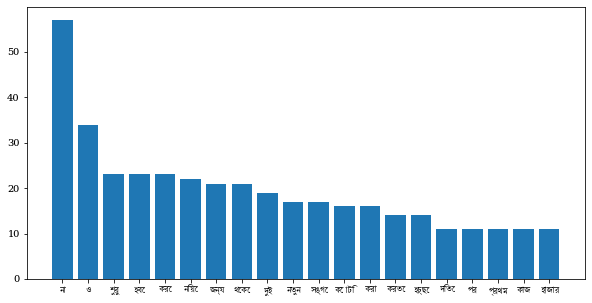

In [ ]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


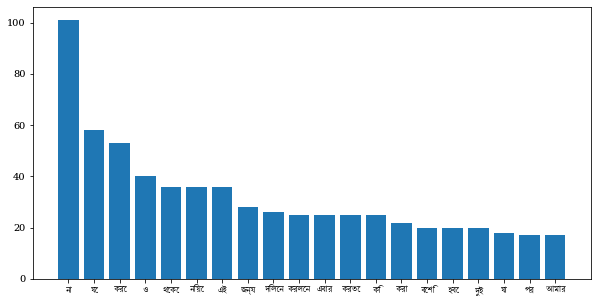

In [ ]:
show_stop_words(fake_corpus)

In [ ]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [ ]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [ ]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [ ]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)


In [ ]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.4 MB/s eta 0:00:00


In [ ]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [ ]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [ ]:
auth = pd.read_csv("/content/drive/My Drive/JU_IT_FND/Fake_news_dataset/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/My Drive/JU_IT_FND/Fake_news_dataset/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10392

In [ ]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue

        if i in punctuations + '‘' + '’':
            continue

        filtered.append(i)

    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
ঢাকা বিশ্ববিদ্যালয়ের (ঢাবি) ব্যবসায় শিক্ষা অনুষদে শুরু হয়েছে দুই দিনব্যাপী ক্যারিয়ার উৎসব। ব্যবসায় শিক্ষা অনুষদ প্রঙ্গণে এই উৎসবের আয়োজক অ্যাসোসিয়েশন অব চার্টার্ড সার্টিফাইড অ্যাকাউন্টস (এসিসিএ)। গতকাল শনিবার থেকে এই উৎসব শুরু হয়। উৎসবে ৪০টি প্রতিষ্ঠান অংশ নিয়েছে। আয়োজকেরা জানান, শিক্ষার্থী, পেশাজীবী ও প্রতিষ্ঠানের মধ্যে একটি যোগাযোগ স্থাপন করাই এই উৎসবের লক্ষ্য। এসিসিএর বিজনেস রিলেশনশিপ ম্যানেজার রেহানা সুলতানা বলেন, এই আয়োজন শুধু যোগাযোগই স্থাপন করছে না, এর পাশাপাশি চাকরিপ্রার্থীদের দক্ষতা অর্জনের প্রশিক্ষণও দেওয়া হয়েছে। রেহানা সুলতানা আরও বলেন, উৎসবে অংশ নেওয়া প্রতিষ্ঠানগুলোর আলাদা আলাদা স্টলে শিক্ষার্থীরা জীবনবৃত্তান্ত জমা দিচ্ছেন। যেগুলো যাচাই–বাছাই শেষে প্রতিষ্ঠানগুলো উপযুক্ত প্রার্থীদের নির্বাচন করবে। আয়োজকেরা জানান, ২০১৪ সালে প্রথমবার এই উৎসবের আয়োজন করা হয়। এরপর প্রতিবছর ব্যাবসায় শিক্ষা অনুষদ প্রাঙ্গণে উৎসবের আয়োজন করা হচ্ছে।

********** After ***************
ঢাকা বিশ্ববিদ্যালয়ের ঢাবি ব্যবসায় শিক্ষা অনুষদে হয়েছে দিনব্যাপী ক্যারিয়ার উৎসব ব্যবসা

In [ ]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [ ]:
len(train_df), len(test_df)

(8313, 2079)

In [ ]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [ ]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

In [ ]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))

        return x

In [ ]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [ ]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[-0.0889, -0.0956]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

In [ ]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [ ]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [ ]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [ ]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.236511.. 	Valid Loss:0.206346.. 	Accuracy: 93.7951
Epoch: 2/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.136849.. 	Valid Loss:0.175084.. 	Accuracy: 95.5748
Epoch: 3/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.064936.. 	Valid Loss:0.179609.. 	Accuracy: 95.5748
Epoch: 4/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.054989.. 	Valid Loss:0.189527.. 	Accuracy: 95.9596
Epoch: 5/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.047518.. 	Valid Loss:0.189245.. 	Accuracy: 95.8634
Training completed in 20m 47s


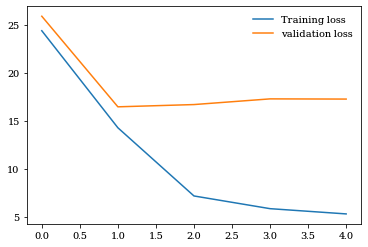

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

In [ ]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

In [ ]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       260
           1       0.96      0.99      0.97      1819

    accuracy                           0.95      2079
   macro avg       0.93      0.85      0.88      2079
weighted avg       0.95      0.95      0.95      2079

